In [3]:
import tensorflow as tf

gpus = tf.config.list_physical_devices("GPU")
if gpus:
    print("GPU available")
    print(tf.config.experimental.get_device_details(gpus[0])["device_name"])
else:
    print("No GPU detected")

GPU available
NVIDIA GeForce RTX 3060


2025-06-21 19:13:13.845743: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


In [30]:
!docker run -it -v /home/srmist/weevil_detection:/workspace nvcr.io/nvidia/tensorflow:25.02-tf2-py3 bash
!ls -l /workspace/audio_data

/bin/bash: line 1: docker: command not found
total 975408
-rw-rw-r-- 1 1000 1000 164513002 Jun 20 19:13 no_larvae.wav
-rw-rw-r-- 1 1000 1000 170687144 Jun 20 19:14 stage_1.wav
-rw-rw-r-- 1 1000 1000 164926912 Jun 20 19:14 stage_2.wav
-rw-rw-r-- 1 1000 1000 160045590 Jun 20 19:14 stage_3.wav
-rw-rw-r-- 1 1000 1000 169240260 Jun 20 19:14 stage_4.wav
-rw-rw-r-- 1 1000 1000 169365662 Jun 20 19:15 stage_5.wav


In [8]:
!pwd

/workspace


In [18]:
# Requirement

In [16]:
!pip install librosa numpy tensorflow pydub scikit-learn pyaudio

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.0 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × Building wheel for pyaudio (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [27 lines of output]
      /tmp/pip-build-env-ibvsl0jx/overlay/local/lib/python3.10/dist-packages/setuptools/dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
      !!
      
              ********************************************************************************
              Please consider removing the following classifiers in favor of a SPDX license expression:
      
              License :: OSI Approved :: MIT License
      
              See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
              *********************************************************

In [17]:
!apt-get update && apt-get install -y portaudio19-dev
!pip install pyaudio

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease 
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [47.7 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3024 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1561 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [4532 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1253 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3340 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [55.7 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [4703 kB]
Get:13 http://arc

In [18]:
import pyaudio

print("PyAudio version:", pyaudio.__version__)

PyAudio version: 0.2.14


In [20]:
!pip install librosa

  Using cached librosa-0.11.0-py3-none-any.whl.metadata (8.7 kB)
  Using cached audioread-3.0.1-py3-none-any.whl.metadata (8.4 kB)
  Using cached soundfile-0.13.1-py2.py3-none-manylinux_2_28_x86_64.whl.metadata (16 kB)
  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
  Using cached soxr-0.5.0.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
Using cached librosa-0.11.0-py3-none-any.whl (260 kB)
Using cached audioread-3.0.1-py3-none-any.whl (23 kB)
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
Using cached pooch-1.8.2-py3-none-any.whl (64 kB)
Using cached soundfile-0.13.1-py2.py3-none-manylinux_2_28_x86_64.whl (1.3 MB)
Using cached soxr-0.5.0.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (252 kB)


In [24]:
!apt update && apt install -y ffmpe
!pip install pydub

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
77 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package ffmpe


In [32]:
!pip install matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 20.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 30.9 MB/s eta 0:00:00


In [7]:
import os

import librosa
import matplotlib.pyplot as plt
import numpy as np
import pyaudio
import seaborn as sns
import tensorflow as tf
from pydub import AudioSegment
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

2025-06-22 19:40:25.334483: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-22 19:40:25.362562: I tensorflow/core/platform/cpu_feature_guard.cc:211] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.10/dist-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [26]:
# Step 1: Split audio files into clips

In [31]:
import os

from pydub import AudioSegment


def split_audio_files(
    input_dir="/workspace/audio_data", output_dir="dataset", clip_duration_ms=5000
):
    # Debug: Current working directory and input directory check
    print(f"Current working directory: {os.getcwd()}")
    if not os.path.exists(input_dir):
        print(f"Error: Directory {input_dir} does not exist")
        return
    print(f"Directory {input_dir} contains: {os.listdir(input_dir)}")

    classes = ["stage_1", "stage_2", "stage_3", "stage_4", "stage_5", "no_larvae"]
    for class_name in classes:
        os.makedirs(os.path.join(output_dir, class_name), exist_ok=True)

    print(f"Scanning directory: {input_dir}")
    for filename in os.listdir(input_dir):
        print(f"Processing file: {filename}")
        if filename.endswith(".wav"):
            class_name = filename.split(".")[0]
            if class_name not in classes:
                print(f"Skipping {filename} - not a recognized class")
                continue
            try:
                audio_path = os.path.join(input_dir, filename)
                print(f"Loading audio from: {audio_path}")
                audio = AudioSegment.from_wav(audio_path)
                total_duration = len(audio)
                print(f"Total duration: {total_duration} ms")
                for i in range(0, total_duration, clip_duration_ms):
                    start = i
                    end = min(i + clip_duration_ms, total_duration)
                    clip = audio[start:end]
                    clip_filename = f"clip_{i//clip_duration_ms:03d}.wav"
                    clip_path = os.path.join(output_dir, class_name, clip_filename)
                    print(f"Saving to: {clip_path}")
                    clip.export(clip_path, format="wav")
                    print(f"Saved: {clip_path}")
            except Exception as e:
                print(f"Error processing {filename}: {str(e)}")
                continue


# Execute the function
if __name__ == "__main__":
    split_audio_files()

Current working directory: /workspace
Directory /workspace/audio_data contains: ['stage_1.wav', 'stage_4.wav', 'stage_3.wav', 'stage_5.wav', 'stage_2.wav', 'no_larvae.wav', '.ipynb_checkpoints']
Scanning directory: /workspace/audio_data
Processing file: stage_1.wav
Loading audio from: /workspace/audio_data/stage_1.wav
Total duration: 1935228 ms
Saving to: dataset/stage_1/clip_000.wav
Saved: dataset/stage_1/clip_000.wav
Saving to: dataset/stage_1/clip_001.wav
Saved: dataset/stage_1/clip_001.wav
Saving to: dataset/stage_1/clip_002.wav
Saved: dataset/stage_1/clip_002.wav
Saving to: dataset/stage_1/clip_003.wav
Saved: dataset/stage_1/clip_003.wav
Saving to: dataset/stage_1/clip_004.wav
Saved: dataset/stage_1/clip_004.wav
Saving to: dataset/stage_1/clip_005.wav
Saved: dataset/stage_1/clip_005.wav
Saving to: dataset/stage_1/clip_006.wav
Saved: dataset/stage_1/clip_006.wav
Saving to: dataset/stage_1/clip_007.wav
Saved: dataset/stage_1/clip_007.wav
Saving to: dataset/stage_1/clip_008.wav
Saved

In [1]:
# Step 2: Preprocess audio to Mel spectrogram and visualize
def load_and_preprocess_audio(file_path, sr=16000, duration=5, n_mels=128, target_shape=(224, 224), visualize=False):
    audio, _ = librosa.load(file_path, sr=sr, duration=duration)
    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels, fmax=2000)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    if visualize:
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mel_spec_db, sr=sr, x_axis="time", y_axis="mel")
        plt.colorbar(format="%+2.0f dB")
        plt.title(f"Mel Spectrogram - {os.path.basename(file_path)}")
        plt.tight_layout()
        plt.show()
    mel_spec_db = tf.image.resize(mel_spec_db[..., np.newaxis], target_shape).numpy()
    mel_spec_db = (mel_spec_db - mel_spec_db.min()) / (mel_spec_db.max() - mel_spec_db.min())
    return np.repeat(mel_spec_db, 3, axis=-1)

In [2]:
# Step 3: Load dataset
def load_dataset(dataset_dir="/workspace/dataset"):
    file_paths = []
    labels = []
    class_to_label = {"stage_1": 0, "stage_2": 1, "stage_3": 2, "stage_4": 3, "stage_5": 4, "no_larvae": 5}
    
    for class_name in class_to_label:
        class_dir = os.path.join(dataset_dir, class_name)
        if os.path.isdir(class_dir):
            for filename in os.listdir(class_dir):
                if filename.endswith(".wav"):
                    file_paths.append(os.path.join(class_dir, filename))
                    labels.append(class_to_label[class_name])
    
    return np.array(file_paths), np.array(labels)

In [3]:
# Step 4: Build MobileNetV2 model
def build_model(num_classes=6):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [8]:
# Main execution
if __name__ == "__main__":
    # Step 1: Split audio files (already done, uncomment if needed)
    # split_audio_files()

    # Step 2: Visualize sample spectrograms (optional)
    sample_files = [os.path.join("/workspace/dataset", cls, "clip_000.wav") for cls in ["stage_1", "stage_2", "stage_3", "stage_4", "stage_5", "no_larvae"]]
    for file_path in sample_files:
        load_and_preprocess_audio(file_path, visualize=False)  # Keep False for speed

    # Step 3-4: Load dataset, build, and train model
    file_paths, labels = load_dataset()
    train_paths, temp_paths, train_labels, temp_labels = train_test_split(file_paths, labels, test_size=0.3, random_state=42)
    val_paths, test_paths, val_labels, test_labels = train_test_split(temp_paths, temp_labels, test_size=0.5, random_state=42)

    def map_func(path, label):
        def py_function(path):
            return load_and_preprocess_audio(path.numpy().decode('utf-8'))
        spectrogram = tf.py_function(py_function, [path], tf.float32)
        spectrogram.set_shape((224, 224, 3))
        return spectrogram, label

    train_dataset = tf.data.Dataset.from_tensor_slices((train_paths, train_labels)).map(map_func).shuffle(len(train_paths)).batch(32).prefetch(tf.data.AUTOTUNE)
    val_dataset = tf.data.Dataset.from_tensor_slices((val_paths, val_labels)).map(map_func).batch(32).prefetch(tf.data.AUTOTUNE)
    test_dataset = tf.data.Dataset.from_tensor_slices((test_paths, test_labels)).map(map_func).batch(32).prefetch(tf.data.AUTOTUNE)

    model = build_model()
    history = model.fit(train_dataset, epochs=20, validation_data=val_dataset)

2025-06-22 19:40:40.333075: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-06-22 19:40:40.333095: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:134] retrieving CUDA diagnostic information for host: be3f3f47acc1
2025-06-22 19:40:40.333100: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:141] hostname: be3f3f47acc1
2025-06-22 19:40:40.333189: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:165] libcuda reported version is: 555.58.2
2025-06-22 19:40:40.333200: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:169] kernel reported version is: 555.58.2
2025-06-22 19:40:40.333203: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:248] kernel version seems to match DSO: 555.58.2


9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/20


2025-06-22 19:41:04.057883: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 1268 of 1587
2025-06-22 19:41:06.721991: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


50/50 [==============================] - 38s 277ms/step - loss: 1.4647 - accuracy: 0.4581 - val_loss: 0.8862 - val_accuracy: 0.8147
Epoch 2/20


2025-06-22 19:41:30.558895: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 1150 of 1587


 1/50 [..............................] - ETA: 11:56 - loss: 1.1271 - accuracy: 0.5000

2025-06-22 19:41:34.973340: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


50/50 [==============================] - 27s 245ms/step - loss: 0.7939 - accuracy: 0.7574 - val_loss: 0.6017 - val_accuracy: 0.8676
Epoch 3/20


2025-06-22 19:41:57.188267: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 1029 of 1587


 1/50 [..............................] - ETA: 13:00 - loss: 0.5875 - accuracy: 0.8438

2025-06-22 19:42:02.912208: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


50/50 [==============================] - 29s 262ms/step - loss: 0.5933 - accuracy: 0.8273 - val_loss: 0.4832 - val_accuracy: 0.8912
Epoch 4/20


2025-06-22 19:42:25.929881: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 1000 of 1587


 1/50 [..............................] - ETA: 13:12 - loss: 0.4095 - accuracy: 0.9375

2025-06-22 19:42:31.896060: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


50/50 [==============================] - 29s 253ms/step - loss: 0.4788 - accuracy: 0.8614 - val_loss: 0.4105 - val_accuracy: 0.8853
Epoch 5/20


2025-06-22 19:42:54.482788: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 959 of 1587


 1/50 [..............................] - ETA: 13:24 - loss: 0.3702 - accuracy: 0.9375

2025-06-22 19:43:00.691904: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


50/50 [==============================] - 29s 252ms/step - loss: 0.3975 - accuracy: 0.8809 - val_loss: 0.3619 - val_accuracy: 0.8912
Epoch 6/20


2025-06-22 19:43:23.261526: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 1002 of 1587


 1/50 [..............................] - ETA: 13:21 - loss: 0.3379 - accuracy: 0.9062

2025-06-22 19:43:29.404912: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


50/50 [==============================] - 29s 255ms/step - loss: 0.3542 - accuracy: 0.8885 - val_loss: 0.3242 - val_accuracy: 0.9088
Epoch 7/20


2025-06-22 19:43:52.124552: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 992 of 1587


 1/50 [..............................] - ETA: 13:13 - loss: 0.2396 - accuracy: 0.9688

2025-06-22 19:43:58.122732: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


50/50 [==============================] - 29s 264ms/step - loss: 0.3218 - accuracy: 0.9099 - val_loss: 0.2950 - val_accuracy: 0.9176
Epoch 8/20


2025-06-22 19:44:21.272756: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 1005 of 1587


 1/50 [..............................] - ETA: 13:14 - loss: 0.3051 - accuracy: 0.8750

2025-06-22 19:44:27.275789: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


50/50 [==============================] - 29s 255ms/step - loss: 0.2755 - accuracy: 0.9193 - val_loss: 0.2732 - val_accuracy: 0.9206
Epoch 9/20


2025-06-22 19:44:49.965418: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 1008 of 1587
2025-06-22 19:44:55.951801: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


50/50 [==============================] - 29s 258ms/step - loss: 0.2605 - accuracy: 0.9294 - val_loss: 0.2518 - val_accuracy: 0.9235
Epoch 10/20


2025-06-22 19:45:18.833861: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 1003 of 1587


 1/50 [..............................] - ETA: 13:06 - loss: 0.2967 - accuracy: 0.8750

2025-06-22 19:45:24.689448: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


50/50 [==============================] - 29s 258ms/step - loss: 0.2340 - accuracy: 0.9364 - val_loss: 0.2377 - val_accuracy: 0.9235
Epoch 11/20


2025-06-22 19:45:47.550263: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 989 of 1587


 1/50 [..............................] - ETA: 14:45 - loss: 0.2844 - accuracy: 0.9375

2025-06-22 19:45:55.427845: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


50/50 [==============================] - 30s 253ms/step - loss: 0.2107 - accuracy: 0.9464 - val_loss: 0.2210 - val_accuracy: 0.9294
Epoch 12/20


2025-06-22 19:46:18.010976: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 1005 of 1587


 1/50 [..............................] - ETA: 13:13 - loss: 0.1289 - accuracy: 0.9688

2025-06-22 19:46:24.014332: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


50/50 [==============================] - 29s 258ms/step - loss: 0.1959 - accuracy: 0.9471 - val_loss: 0.2127 - val_accuracy: 0.9294
Epoch 13/20


2025-06-22 19:46:46.852845: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 1007 of 1587


 1/50 [..............................] - ETA: 13:06 - loss: 0.2053 - accuracy: 0.9688

2025-06-22 19:46:52.716093: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


50/50 [==============================] - 29s 257ms/step - loss: 0.1881 - accuracy: 0.9534 - val_loss: 0.2010 - val_accuracy: 0.9353
Epoch 14/20


2025-06-22 19:47:15.490577: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 1013 of 1587


 1/50 [..............................] - ETA: 13:05 - loss: 0.1752 - accuracy: 0.9688

2025-06-22 19:47:21.326699: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


50/50 [==============================] - 28s 250ms/step - loss: 0.1749 - accuracy: 0.9559 - val_loss: 0.1897 - val_accuracy: 0.9382
Epoch 15/20


2025-06-22 19:47:43.787930: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 1014 of 1587


 1/50 [..............................] - ETA: 12:55 - loss: 0.1233 - accuracy: 0.9688

2025-06-22 19:47:49.420072: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


50/50 [==============================] - 28s 254ms/step - loss: 0.1604 - accuracy: 0.9546 - val_loss: 0.1839 - val_accuracy: 0.9412
Epoch 16/20


2025-06-22 19:48:12.079426: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 1025 of 1587


 1/50 [..............................] - ETA: 12:53 - loss: 0.2665 - accuracy: 0.9375

2025-06-22 19:48:17.679196: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


50/50 [==============================] - 28s 254ms/step - loss: 0.1477 - accuracy: 0.9685 - val_loss: 0.1745 - val_accuracy: 0.9382
Epoch 17/20


2025-06-22 19:48:40.342341: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 1012 of 1587


 1/50 [..............................] - ETA: 13:00 - loss: 0.1623 - accuracy: 0.9062

2025-06-22 19:48:46.070721: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


50/50 [==============================] - 29s 257ms/step - loss: 0.1457 - accuracy: 0.9609 - val_loss: 0.1677 - val_accuracy: 0.9559
Epoch 18/20


2025-06-22 19:49:08.873505: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 991 of 1587


 1/50 [..............................] - ETA: 13:19 - loss: 0.1430 - accuracy: 1.0000

2025-06-22 19:49:14.994076: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


50/50 [==============================] - 29s 251ms/step - loss: 0.1362 - accuracy: 0.9723 - val_loss: 0.1641 - val_accuracy: 0.9559
Epoch 19/20


2025-06-22 19:49:37.485964: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 1013 of 1587


 1/50 [..............................] - ETA: 13:02 - loss: 0.1368 - accuracy: 0.9688

2025-06-22 19:49:43.245494: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


50/50 [==============================] - 28s 253ms/step - loss: 0.1317 - accuracy: 0.9691 - val_loss: 0.1572 - val_accuracy: 0.9441
Epoch 20/20


2025-06-22 19:50:05.844586: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 1010 of 1587


 1/50 [..............................] - ETA: 13:09 - loss: 0.1247 - accuracy: 0.9688

2025-06-22 19:50:11.741235: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


50/50 [==============================] - 29s 255ms/step - loss: 0.1218 - accuracy: 0.9685 - val_loss: 0.1515 - val_accuracy: 0.9588


In [10]:
# Visualization functions
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(model, test_dataset):
    y_true = []
    y_pred = []
    for x, y in test_dataset:
        y_true.extend(y.numpy())
        pred = model.predict(x)
        y_pred.extend(np.argmax(pred, axis=1))
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['stage_1', 'stage_2', 'stage_3', 'stage_4', 'stage_5', 'no_larvae'],
                 yticklabels=['stage_1', 'stage_2', 'stage_3', 'stage_4', 'stage_5', 'no_larvae'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

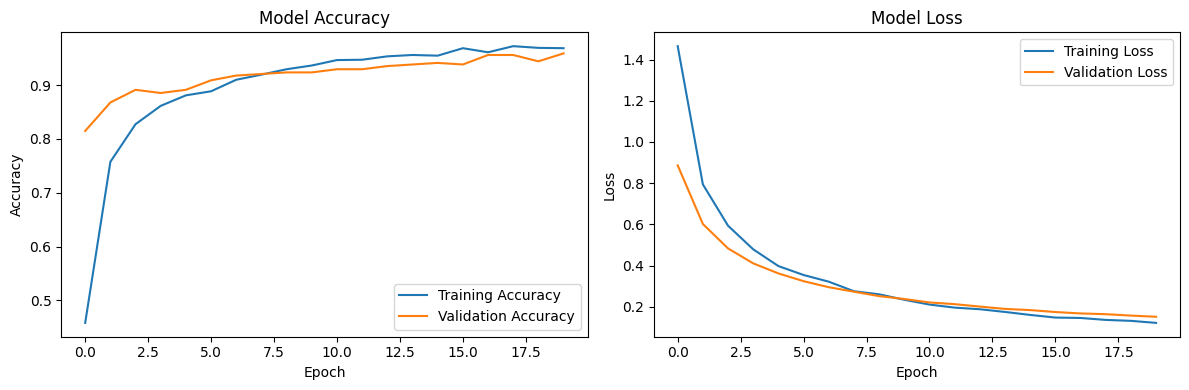

In [12]:
# Step 5: Visualize training history
plot_training_history(history)

In [13]:
# Step 6: Evaluate on test set
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

11/11 [==============================] - 4s 347ms/step - loss: 0.1534 - accuracy: 0.9413
Test accuracy: 0.9413
Test loss: 0.1534


1/1 [==============================] - 2s 2s/step


2025-06-22 20:15:43.961268: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


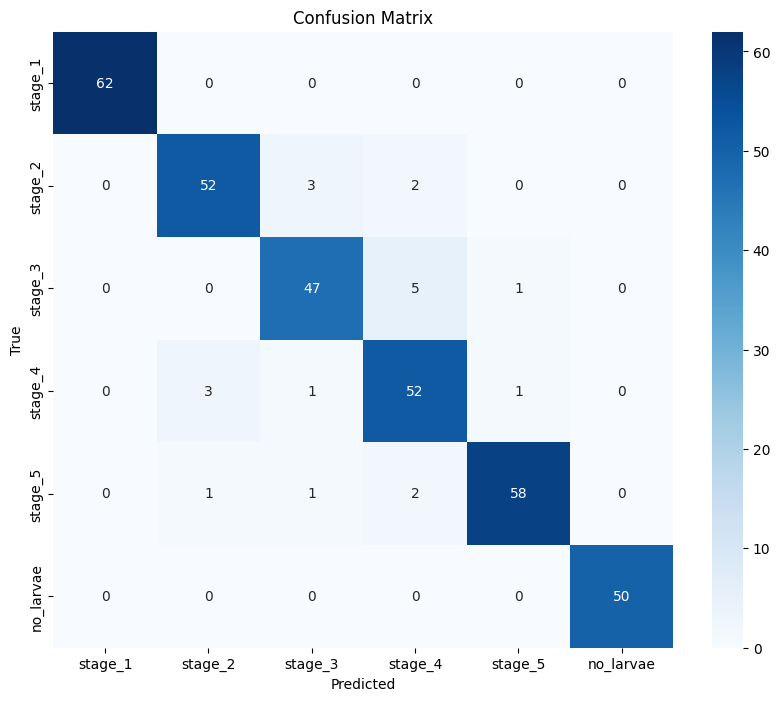

In [14]:
# Step 7: Visualize confusion matrix
plot_confusion_matrix(model, test_dataset)

In [4]:
# Step 5: Real-time audio capture
def capture_audio(duration=5, sr=16000):
    p = pyaudio.PyAudio()
    stream = p.open(format=pyaudio.paInt16, channels=1, rate=sr, input=True, frames_per_buffer=1024)
    frames = []
    for _ in range(int(sr * duration / 1024)):
        data = stream.read(1024)
        frames.append(np.frombuffer(data, dtype=np.int16))
    stream.stop_stream()
    stream.close()
    p.terminate()
    return np.concatenate(frames) / 32768.0